## Exercises I

Run `python -m pip install pymysql` from your terminal to install pymysql.

Create a notebook or python script named `advanced_dataframes` to do your work in for these exercises.

1. Run `python -m pip install pymysql` from your terminal to install the mysql client (any folder is fine)
1. cd into your exercises folder for this module and run `echo env.py >> .gitignore`
1. Create a function named `get_db_url`. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

2. Use your function to obtain a connection to the `employees` database.

3. Once you have successfully run a query:

    a. Intentionally make a typo in the database url. What kind of error message do you see?
    
    b. Intentionally make an error in your SQL query. What does the error message look like?

4. Read the `employees` and `titles` tables into two separate DataFrames.

5. How many rows and columns do you have in each DataFrame? Is that what you expected?

6. Display the summary statistics for each DataFrame.

7. How many unique titles are in the `titles` DataFrame?

8. What is the oldest date in the `to_date` column? 

9. What is the most recent date in the `to_date` column?

In [7]:
import pandas as pd
import numpy as np

In [24]:
from env import host, user, password

def get_db_url(user,host,password,dbname):
    url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    return url
    

In [25]:
dbname = 'employees'
url = get_db_url(user,host,password,dbname)

In [29]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [18]:
query = '''
SELECT
    t.title as title,
    d.dept_name as dept_name
FROM titles t
JOIN dept_emp USING (emp_no)
JOIN departments d USING (dept_no)
LIMIT 10
'''

title_dept = pd.read_sql(query, url)
title_dept.head()

,title,dept_name
0,Staff,Customer Service
1,Senior Staff,Customer Service
2,Staff,Customer Service
3,Senior Staff,Customer Service
4,Staff,Customer Service


### Once you have successfully run a query:
- a. Intentionally make a typo in the database url. What kind of error message do you see?
- b. Intentionally make an error in your SQL query. What does the error message look like?

In [14]:
pd.read_sql('SELECT * FROM employes LIMIT 5 OFFSET 50', get_db_url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.employes' doesn't exist")
[SQL: SELECT * FROM employes LIMIT 5 OFFSET 50]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [13]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_urls)

NameError: name 'get_db_urls' is not defined

### Read the employees and titles tables into two separate DataFrames.

### How many rows and columns do you have in each DataFrame? Is that what you expected?

In [42]:
employees = pd.read_sql('SELECT * FROM employees', url)

In [43]:
employees.to_csv('employees.csv')

In [44]:
employees = pd.read_csv('employees.csv', index_col=0)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [39]:
dbname='employees'
titles=pd.read_sql('SELECT * FROM titles', url)
titles.to_csv('titles.csv')

In [41]:
titles = pd.read_csv('titles.csv', index_col=0)
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [45]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


### 7. How many rows and columns do you have in each DataFrame? Is that what you expected?

In [46]:
employees.shape

(300024, 6)

In [47]:
titles.shape

(443308, 4)

### 8. Display the summary statistics for each DataFrame.

In [63]:
employees.describe(), employees.info()
# Not valuable with emp_no as only int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 16.0+ MB


(              emp_no
 count  300024.000000
 mean   253321.763392
 std    161828.235540
 min     10001.000000
 25%     85006.750000
 50%    249987.500000
 75%    424993.250000
 max    499999.000000,
 None)

In [51]:
# titles.describe()
# Not valuable since emp_no is the only int available

### 9. How many unique titles are in the titles DataFrame?
### 10. What is the oldest date in the to_date column?
### 11. What is the most recent date in the to_date column?

In [52]:
titles.title.value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [53]:
titles.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [54]:
titles['to_date'].min()

'1985-03-01'

In [55]:
# First attempt didn't return what I wanted
titles['to_date'].max()

'9999-01-01'

In [59]:
# Returns what I want, but unexpected format
title_date = pd.read_sql('''SELECT * FROM titles WHERE to_date <=NOW()''',url)
title_date.sort_values(by='to_date')['to_date'].max()

datetime.date(2002, 8, 1)

# Indexing and Subsetting

## Exercises II

1. Copy the `users` and `roles` DataFrames from the examples above. 

2. What is the result of using a `right` join on the DataFrames? 

3. What is the result of using an `outer` join on the DataFrames?
     
4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

5. Load the `mpg` dataset from PyDataset. 

6. Output and read the documentation for the `mpg` dataset.

7. How many rows and columns are in the dataset?

8. Check out your column names and perform any cleanup you may want on them.

9. Display the summary statistics for the dataset.

10. How many different manufacturers are there?

11. How many different models are there?

12. Create a column named `mileage_difference` like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

13. Create a column named `average_mileage` like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

14. Create a new column on the `mpg` dataset named `is_automatic` that holds boolean values denoting whether the car has an automatic transmission.

15. Using the `mpg` dataset, find out which which manufacturer has the best miles per gallon on average?

16. Do automatic or manual cars have better miles per gallon?

In [60]:
# Create the users DataFrame.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [62]:
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [64]:
# 2. What is the result of using a right join on the DataFrames?
users.merge(roles, how="right")

,id,name,role_id
0,1,admin,NaN
1,2,author,NaN
2,3,reviewer,NaN
3,4,commenter,NaN


In [65]:
# 3. What is the result of using an outer join on the DataFrames?
users.merge(roles, how="outer")

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


In [69]:
# What happens if you drop the foreign keys from the DataFrames and try to merge them?
users.drop(columns='id').merge(roles.drop(columns='id'),how='outer', left_index=True, right_index=True,indicator = True)

,name_x,role_id,name_y,_merge
0,bob,1.0,admin,both
1,joe,2.0,author,both
2,sally,3.0,reviewer,both
3,adam,3.0,commenter,both
4,jane,NaN,NaN,left_only
5,mike,NaN,NaN,left_only


In [ ]:
# has to be an outer merge to work

In [73]:
# 5. Load the mpg dataset from PyDataset.
from pydataset import data
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [75]:
# 6. Output and read the documentation for the mpg dataset.
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [77]:
#7. How many rows and columns are in the dataset?
mpg.shape

(234, 11)

In [80]:
#8. Check out your column names and perform any cleanup you may want on them.
mpg = mpg.rename(columns={'cty':'city', 'hwy': 'highway'})
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   city          234 non-null    int64  
 8   highway       234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [81]:
#9 Display the summary statistics for the dataset.
mpg.describe()

,displ,year,cyl,city,highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [86]:
# 10. How many different manufacturers are there?
mpg.manufacturer.nunique()

15

In [87]:
#11. How many different models are there?
mpg.model.nunique()

38

In [89]:
# 12. Create a column named mileage_difference like you did in the DataFrames exercises;
# this column should contain the difference between highway and city mileage for 
# each car.

mpg['mileage_difference']= mpg.highway-mpg.city
mpg

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


13. Create a column named `average_mileage` like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

14. Create a new column on the `mpg` dataset named `is_automatic` that holds boolean values denoting whether the car has an automatic transmission.

15. Using the `mpg` dataset, find out which which manufacturer has the best miles per gallon on average?

16. Do automatic or manual cars have better miles per gallon?

In [97]:
#13. 
mpg['average_mileage'] = (mpg.city + mpg.highway)/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_milage,is_automatic,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False,22.0


In [94]:
# 14. Create a new column on the mpg dataset named is_automatic that holds 
#.    boolean values denoting whether the car has an automatic transmission.
mpg['is_automatic'] = mpg.trans.str.contains('auto')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_milage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [207]:
#15. Using the mpg dataset, 
#    find out which which manufacturer has the best miles per gallon on average?
mpg.groupby('manufacturer').average_mileage.mean().nlargest()

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
Name: average_mileage, dtype: float64

In [101]:
#16. Do automatic or manual cars have better miles per gallon?
mpg.groupby('is_automatic').average_mileage.mean()

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

## Exercises III

1. Use your `get_db_url` function to help you explore the data from the `chipotle` database. 

2. What is the total price for each order?

3. What are the most popular 3 items?

4. Which item has produced the most revenue?

5. Join the `employees` and `titles` DataFrames together.

6. For each title, find the hire date of the employee that was hired most recently with that title.

7. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [144]:
# 1. Use your get_db_url function to help you explore the data from the chipotle database.
dbname = 'chipotle'
url = url = f'mysql+pymysql://{user}:{password}@{host}/{dbname}'
chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [145]:
#what is data
chipotle.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [146]:
#Clean Data
chipotle['s_item_price'] = chipotle.item_price.str.replace('$','').astype(float)
chipotle.head()

/var/folders/0d/pgx59prx25q_12vq2yt8dvtw0000gn/T/ipykernel_7780/513414222.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['s_item_price'] = chipotle.item_price.str.replace('$','').astype(float)


,id,order_id,quantity,item_name,choice_description,item_price,s_item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98


In [147]:
# 2. What is the total price for each order?
chipotle.groupby('order_id').sum('s_item_price')

,id,quantity,s_item_price
order_id,,,
1,10,4,11.56
2,5,2,16.98
3,13,2,12.67
4,17,2,21.00
5,21,2,13.70
...,...,...,...
1830,9223,2,23.00
1831,13842,3,12.90
1832,9233,2,13.20


In [148]:
# 3 What are the most popular 3 items?
 # Curious to total $ amount made from popular items - Need a total_cost column
chipotle['total_cost'] = chipotle['quantity']*chipotle['s_item_price']
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price,s_item_price,total_cost
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98,33.96


In [149]:
chipotle[["item_name","quantity","total_cost"]].groupby('item_name').sum('quantity').sort_values('quantity',ascending = False).head(3)

,quantity,total_cost
item_name,,
Chicken Bowl,761,8044.63
Chicken Burrito,591,6387.06
Chips and Guacamole,506,2475.62


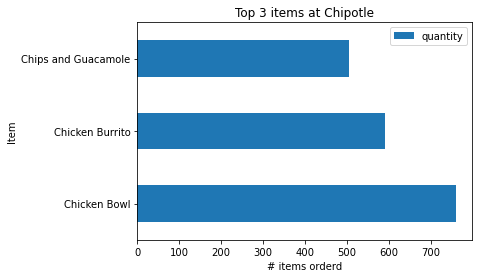

In [241]:
# Trying Visual representation 
import matplotlib.pyplot as plt
top_three = chipotle[["item_name","quantity"]].groupby('item_name').sum('quantity').sort_values('quantity',ascending = False).head(3)
top_three.plot(kind='barh')
plt.title('Top 3 items at Chipotle')
plt.xlabel('# items orderd')
plt.ylabel('Item')
plt.show()


In [153]:
# 4. Which item has produced the most revenue?
chipotle[['item_name','quantity','item_price','total_cost']].groupby('item_name').sum('quantity').sort_values('total_cost', ascending = False).head(5)

,quantity,total_cost
item_name,,
Chicken Bowl,761,8044.63
Chicken Burrito,591,6387.06
Steak Burrito,386,4236.13
Steak Bowl,221,2479.81
Chips and Guacamole,506,2475.62


In [154]:
#5. Join the employees and titles DataFrames together.
employees.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [155]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [158]:
emp_titles = employees.merge(titles,on = 'emp_no',indicator = True)
emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,_merge
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,both
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,both
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,both
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,both
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,both


In [169]:
#6. For each title, find the hire date of the employee that was hired most recently 
#.  with that title.
emp_titles['current']=np.where(emp_titles.to_date > '202*','current_pos','old_pos')
emp_titles['full_name']= emp_titles.first_name +'_' + emp_titles.last_name

In [170]:
emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,_merge,current,full_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,both,current_pos,Georgi_Facello
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,both,current_pos,Bezalel_Simmel
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,both,current_pos,Parto_Bamford
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,both,old_pos,Chirstian_Koblick
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,both,current_pos,Chirstian_Koblick


In [199]:
emp_titles.dtypes

emp_no           int64
birth_date      object
first_name      object
last_name       object
gender          object
hire_date       object
title           object
from_date       object
to_date         object
_merge        category
current         object
full_name       object
dtype: object

In [178]:
emp_titles[['title','full_name','hire_date']].groupby('title').max()

,full_name,hire_date
title,,
Assistant Engineer,Zvonko_Spell,1999-12-24
Engineer,Zvonko_Zuberek,2000-01-28
Manager,Yuchang_Weedman,1992-02-05
Senior Engineer,Zvonko_Zuberek,2000-01-01
Senior Staff,Zvonko_Zobel,2000-01-13
Staff,Zvonko_Zobel,2000-01-12
Technique Leader,Zvonko_Yoshizawa,1999-12-31


In [179]:
#7. Write the code necessary to create a cross tabulation of the number of titles by department. 
#  (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [181]:
dept_titles_df = '''
                SELECT t.emp_no,
                        t.title,
                        t.to_date,
                        d.dept_name
                FROM departments as d
                JOIN dept_emp as de USING(dept_no)
                JOIN titles as t USING(emp_no)
                WHERE to_date >;
                '''

In [191]:
dbname = 'employees'
url = f'mysql+pymysql://{user}:{password}@{host}/{dbname}'
dept_titles = pd.read_sql(dept_titles_df, url)
dept_titles.head()

,emp_no,title,to_date,dept_name
0,10011,Staff,1996-11-09,Customer Service
1,10038,Senior Staff,9999-01-01,Customer Service
2,10038,Staff,1996-09-20,Customer Service
3,10049,Senior Staff,9999-01-01,Customer Service
4,10049,Staff,2000-05-04,Customer Service


In [195]:
dept_titles.dtypes

emp_no        int64
title        object
to_date      object
dept_name    object
dtype: object

In [233]:
dept_titles.shape

(489903, 5)

In [234]:
titles_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title, margins=True)
titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
dept_name,,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309,35075
Development,7769,58135,2,49326,1247,1424,7683,125586
Finance,0,0,2,0,12139,13929,0,26070
Human Resources,0,0,2,0,12274,14342,0,26618
Marketing,0,0,2,0,13940,16196,0,30138
Production,6445,49649,4,42205,1270,1478,6557,107608
Quality Management,1831,13852,4,11864,0,0,1795,29346
Research,378,2986,2,2570,11637,13495,393,31461
Sales,0,0,2,0,36191,41808,0,78001


In [225]:
#To find Current employees
dept_titles['curr_emp'] = dept_titles.to_date > pd.Timestamp.today()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [232]:
dept_titles_c = dept_titles[dept_titles.curr_emp == True]
dept_titles_c.head()

,emp_no,title,to_date,dept_name,curr_emp
1,10038,Senior Staff,9999-01-01,Customer Service,True
3,10049,Senior Staff,9999-01-01,Customer Service,True
5,10060,Senior Staff,9999-01-01,Customer Service,True
7,10088,Senior Staff,9999-01-01,Customer Service,True
11,10112,Staff,9999-01-01,Customer Service,True


In [230]:
# Trying to filter out non-current employees
titles_crosstab_c = pd.crosstab(dept_titles_c.dept_name, dept_titles_c.title, margins=True)
titles_crosstab_c

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
dept_name,,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241,18978
Development,1833,15677,1,43364,1085,315,6117,68392
Finance,0,0,1,0,10650,3199,0,13850
Human Resources,0,0,1,0,10843,3416,0,14260
Marketing,0,0,1,0,12371,3880,0,16252
Production,1542,13325,1,37156,1123,349,5210,58706
Quality Management,433,3744,1,10390,0,0,1422,15990
Research,77,830,1,2250,10219,3206,321,16904
Sales,0,0,1,0,32032,9967,0,42000
